In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
mpg = pd.read_csv('auto-mpg.csv')

In [11]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


 ### Data Cleaning

In [14]:
#size of dataset
mpg.shape

(398, 9)

In [16]:
#info about dataset
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [18]:
#null values
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

##### There's no null values in our dataset as we see above.

In [21]:
mpg.duplicated().sum()

0

In [23]:
#duplicate records
mpg.drop_duplicates(inplace=True)

In [25]:
mpg.shape

(398, 9)

##### There's no duplicate values in our original dataset as we see above.

In [28]:
#mpg horsepower is object datatype -- meaning could be inconsistent
mpg['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [30]:
#drop ? values in horsepower column
mpg = mpg[mpg['horsepower']!= '?']

In [32]:
mpg[mpg['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [34]:
mpg['origin'].value_counts()

origin
1    245
3     79
2     68
Name: count, dtype: int64

In [36]:
#categorizing origin column
mpg.loc[mpg['origin']==1, 'origin'] = 'USA'
mpg.loc[mpg['origin']==2, 'origin'] = 'Europe'
mpg.loc[mpg['origin']==3, 'origin'] = 'Asia'

/var/folders/8y/_nxp_0_n50q0qqq5tr00vwsr0000gn/T/ipykernel_60891/682094209.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'USA' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mpg.loc[mpg['origin']==1, 'origin'] = 'USA'


In [38]:
mpg['origin'].value_counts()

origin
USA       245
Asia       79
Europe     68
Name: count, dtype: int64

In [40]:
mpg['origin'] = mpg['origin'].astype('category')

In [42]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    object  
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   model year    392 non-null    int64   
 7   origin        392 non-null    category
 8   car name      392 non-null    object  
dtypes: category(1), float64(3), int64(3), object(2)
memory usage: 28.1+ KB


### Exploratory Analysis

Fuel Efficiency Trends:
1. How does mpg vary across different cylinders?
2. What is the trend of mpg over different model years?

Horsepower & Performance:
1. What is the relationship between horsepower and mpg?
2. How does acceleration correlate with horsepower?

Vehicle Characteristics:
1. What is the distribution of weight in the dataset?
2. How does displacement relate to mpg?
3. Are heavier cars less fuel-efficient?

Categorical Analysis:
1. What is the distribution of cars from different origins?
2. Which car names appear most frequently?

In [108]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [110]:
mpg['cylinders'].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

#### Fuel Efficiency Trends:
1. How does mpg vary across different cylinders?

In [113]:
mpg.groupby('cylinders')['mpg'].describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
3,4.0,20.550000,2.564501,18.0,18.75,20.25,22.05,23.7
4,204.0,29.286765,5.710156,18.0,25.00,28.25,33.00,46.6
5,3.0,27.366667,8.228204,20.3,22.85,25.40,30.90,36.4
6,84.0,19.985714,3.807322,15.0,18.00,19.00,21.00,38.0
8,103.0,14.963107,2.836284,9.0,13.00,14.00,16.00,26.6


#### Box Plot
Boxplot summarizes a sample data using 25th, 50th and 75th percentiles. These percentiles are also known as the lower quartile, median and upper quartile.

To compare fuel efficiency across different cylinder configurations, let's visualize a boxplot

<Axes: title={'center': 'mpg'}, xlabel='cylinders'>

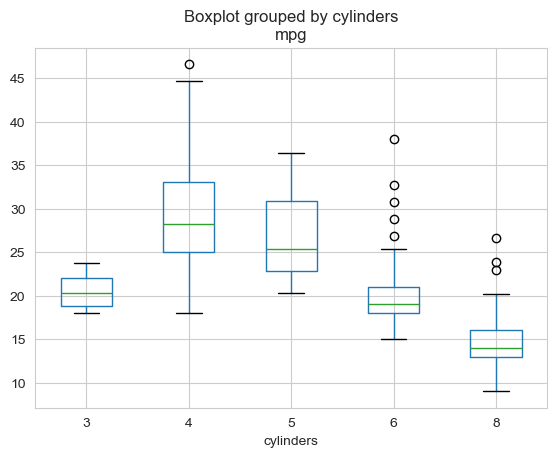

In [116]:
mpg.boxplot(by='cylinders', column=['mpg'], grid=True)

In [118]:
#can also do this with seaborn
import seaborn as sns

In [120]:
mpg = sns.load_dataset('mpg')

In [122]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [124]:
sns.set_style("whitegrid")

<Axes: xlabel='cylinders', ylabel='mpg'>

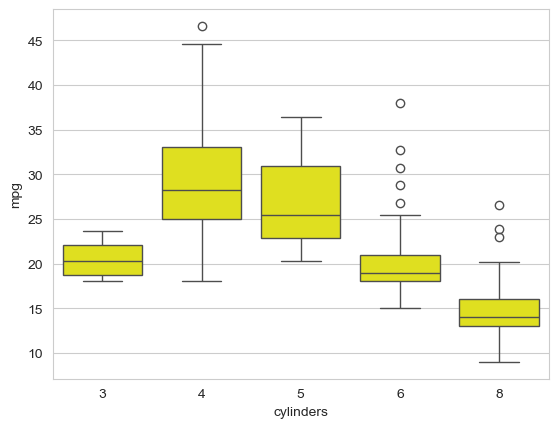

In [126]:
sns.boxplot(x='cylinders', y='mpg', data=mpg, color='yellow')

2. What is the trend of mpg over different model years?

In [133]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [135]:
mpg['model_year'].value_counts()

model_year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

In [143]:
avg_mpg = mpg.groupby('model_year')['mpg'].mean()
avg_mpg

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

In [153]:
unique_years = mpg['model_year'].unique()
unique_years

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

#### Line Graph
We see an overall steady increase in mpg for the newer models.

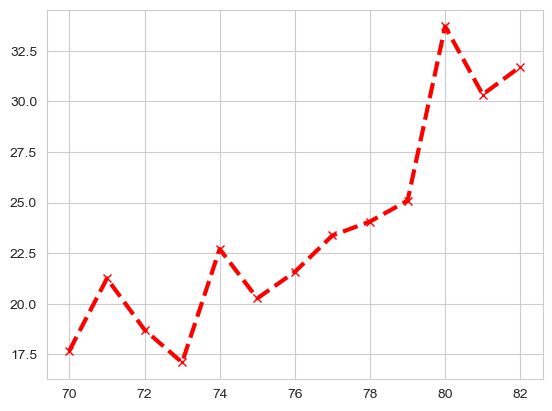

In [174]:
plt.plot(unique_years, avg_mpg, linewidth=3, linestyle='dashed', color='red', marker='x')
plt.show()